In [1]:
#Vikram Radhakrishnan, 15 Feb, 2020
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
df=pd.read_csv('Mcdonald.csv')
%matplotlib inline

In [2]:
df.head(1) # Browsing through the format of the file imported

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15


# Q1 : Plot graphically which food categories have the highest and lowest varieties.



ANSWER 1: INFERENCE:From the figure, we see the coffee & Tea Cateogry has the highest number of varieties 
 and the Salads category has the lowest 


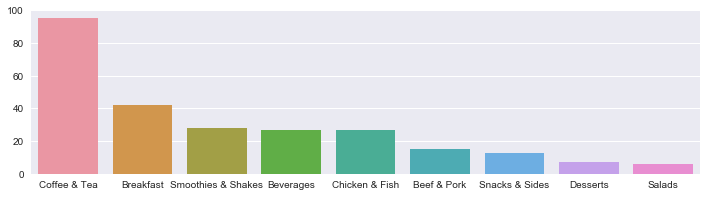

In [3]:
a=df.Category.value_counts()
Horz=a.keys()
Vert=a.values
fig_dims = (12, 3)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(Horz,Vert)
print("ANSWER 1: INFERENCE:From the figure, we see the coffee & Tea Cateogry has the highest number of varieties \n and the Salads category has the lowest ")



# Q2 : Which all variables have an outlier?


In [4]:
outlier_headings=[]
headers=df.columns[3:]
for i in headers:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    upper=Q3+(1.5*IQR)
    lower=Q1-(1.5*IQR)
    if (df[i].min()<lower) or (df[i].max()>upper):
        print(i,"-Outlier")
        outlier_headings.append(i)


Calories -Outlier
Calories from Fat -Outlier
Total Fat -Outlier
Total Fat (% Daily Value) -Outlier
Trans Fat -Outlier
Cholesterol -Outlier
Cholesterol (% Daily Value) -Outlier
Sodium -Outlier
Sodium (% Daily Value) -Outlier
Carbohydrates -Outlier
Carbohydrates (% Daily Value) -Outlier
Dietary Fiber (% Daily Value) -Outlier
Sugars -Outlier
Protein -Outlier
Vitamin A (% Daily Value) -Outlier
Vitamin C (% Daily Value) -Outlier
Calcium (% Daily Value) -Outlier
Iron (% Daily Value) -Outlier


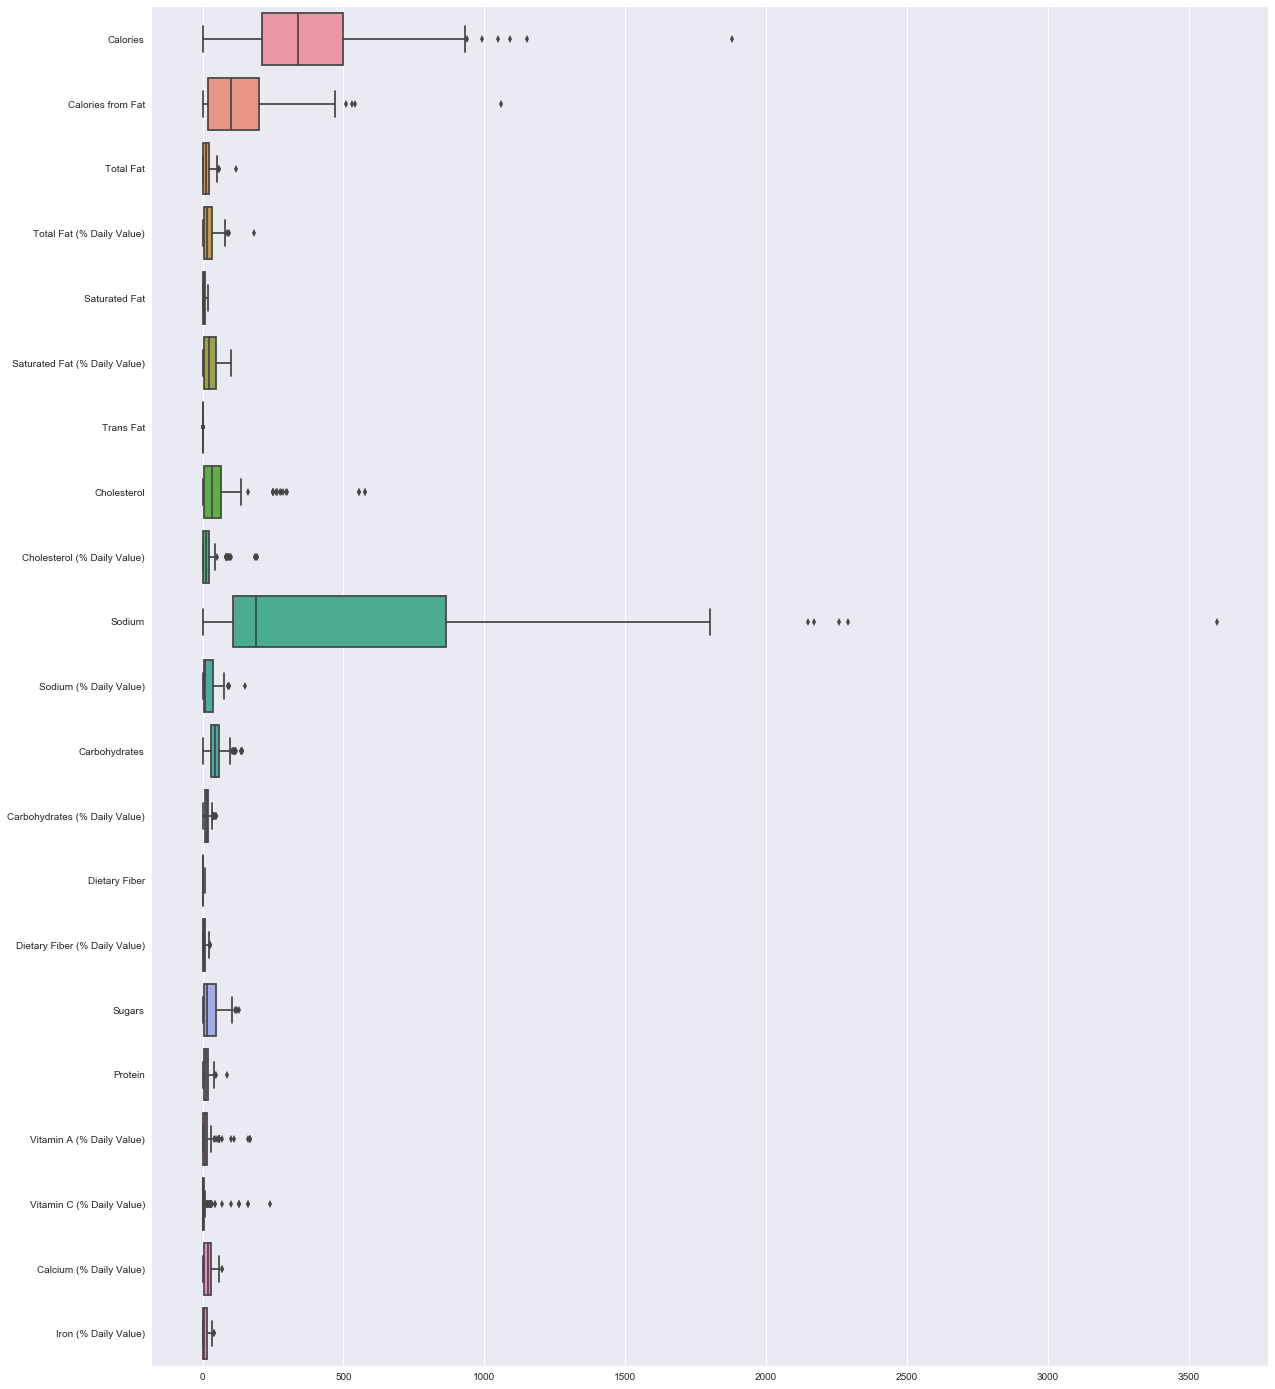

In [65]:
dfc=df.drop(['Category','Item','Serving Size'],axis=1) # Drop non-numeric columns
fig, ax = plt.subplots(figsize=(20,25))
sns.boxplot(data=dfc,orient="h")

# Q3 : Which variables have the Highest correlation. Plot them and find out the value ?


In [6]:
# Question no 3 - Solution: 
a=df.columns # Store the column heads separately
a

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [38]:
corre=df[['Calories', 'Calories from Fat','Total Fat','Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)']].corr()


                


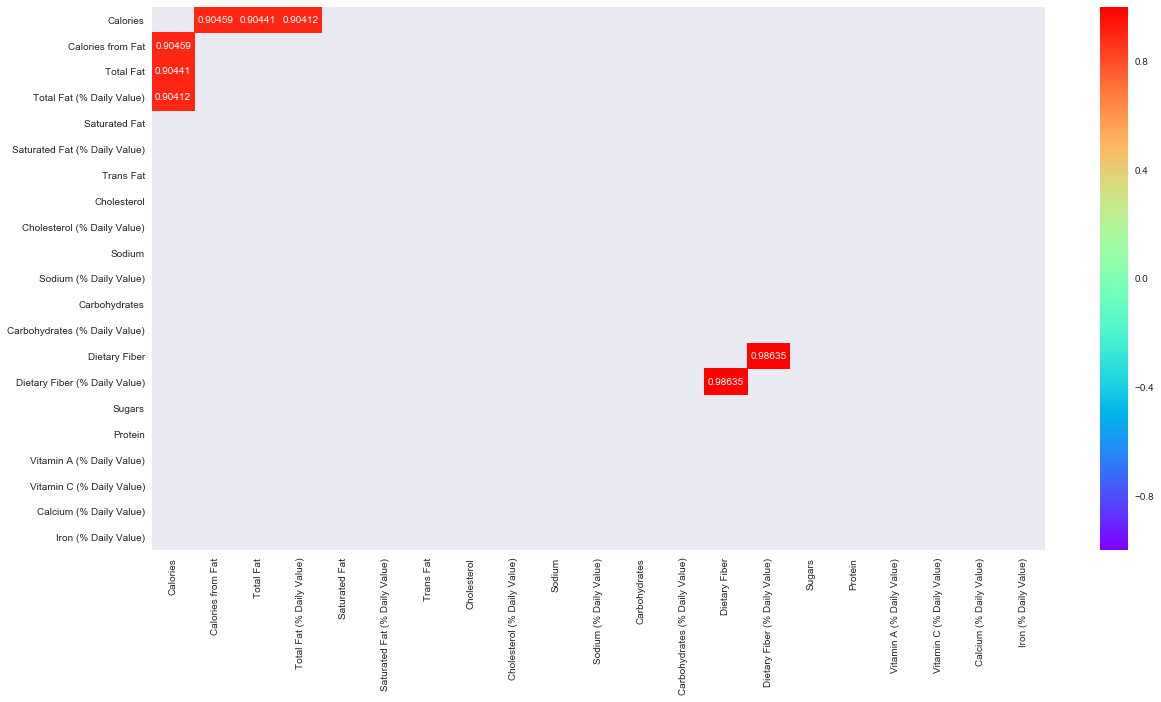

In [39]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)

threshold=0.90 # This is a self chosen threshold value to show only values that have high correlation
sns.heatmap(corre[(corre>threshold) & (corre<0.99)],annot=True, cmap='rainbow',vmin=-1,vmax=1,fmt=".5f") # Ignore the self correlation values by using 0.99 as a limit

In [40]:
x=(corre[(corre>threshold) & (corre<1)])
rowcoldex=x.keys()
for i in range(0,21):
    for j in range(0,21):
        if ((x.iloc[i,j]>threshold) & (x.iloc[i,j]<0.99) or(x.iloc[i,j]>-threshold) & (x.iloc[i,j]<-0.99) ): # covers both positive and negative correlation
            print("There is strong correlation between : ", rowcoldex[i], "&",rowcoldex[j],"\n") 
#x.columns


There is strong correlation between :  Calories & Calories from Fat 

There is strong correlation between :  Calories & Total Fat 

There is strong correlation between :  Calories & Total Fat (% Daily Value) 

There is strong correlation between :  Calories from Fat & Calories 

There is strong correlation between :  Total Fat & Calories 

There is strong correlation between :  Total Fat (% Daily Value) & Calories 

There is strong correlation between :  Dietary Fiber & Dietary Fiber (% Daily Value) 

There is strong correlation between :  Dietary Fiber (% Daily Value) & Dietary Fiber 



# Q4 : Which category contributes to the maximum % of Cholesterol in a diet (% daily value)?


In [41]:
Bfast=df[df['Category']=='Breakfast']
Bfast['Cholesterol (% Daily Value)'].mean()

50.95238095238095

In [42]:
categori=df.Category.unique()

In [43]:
dict={}
for i in categori:
        cat=df[df['Category']==i]
        print("The total calories in ", i, "due to cholestrol is : ", cat['Cholesterol (% Daily Value)'].mean())
        dict[i]=cat['Cholesterol (% Daily Value)'].mean()
        

The total calories in  Breakfast due to cholestrol is :  50.95238095238095
The total calories in  Beef & Pork due to cholestrol is :  28.933333333333334
The total calories in  Chicken & Fish due to cholestrol is :  25.22222222222222
The total calories in  Salads due to cholestrol is :  17.333333333333332
The total calories in  Snacks & Sides due to cholestrol is :  6.230769230769231
The total calories in  Desserts due to cholestrol is :  4.857142857142857
The total calories in  Beverages due to cholestrol is :  0.18518518518518517
The total calories in  Coffee & Tea due to cholestrol is :  9.378947368421052
The total calories in  Smoothies & Shakes due to cholestrol is :  14.714285714285714


In [44]:
dict

{'Beef & Pork': 28.933333333333334,
 'Beverages': 0.18518518518518517,
 'Breakfast': 50.95238095238095,
 'Chicken & Fish': 25.22222222222222,
 'Coffee & Tea': 9.378947368421052,
 'Desserts': 4.857142857142857,
 'Salads': 17.333333333333332,
 'Smoothies & Shakes': 14.714285714285714,
 'Snacks & Sides': 6.230769230769231}

In [45]:
dict.items()
foodframe=pd.DataFrame([dict])

In [46]:
foodframe

,Beef & Pork,Beverages,Breakfast,Chicken & Fish,Coffee & Tea,Desserts,Salads,Smoothies & Shakes,Snacks & Sides
0,28.933333,0.185185,50.952381,25.222222,9.378947,4.857143,17.333333,14.714286,6.230769


In [47]:
maxcal=foodframe.iloc[0].max()

In [48]:
maxcal


50.952380952380949

In [49]:
food=foodframe.transpose()

In [50]:
a=food[food[0]==maxcal].index[0]

In [51]:
print("\n The maximum calories by percentage is provided by the category :",a, "and has a average value of :",maxcal,"\n\n")


 The maximum calories by percentage is provided by the category : Breakfast and has a average value of : 50.9523809524 




# Q5 : Which item contributes maximum to the Sodium intake?


In [66]:
it=df.groupby(['Item']).sum() # Groups by Item, and sums up the values of each item

In [53]:
maxsod=it['Sodium'].max() # Gets the value with maximum sodium
print(maxsod)

3600


In [54]:
sodiumitem=it[it['Sodium']==maxsod] # Finds out the item which has max sodium value


In [55]:
m=sodiumitem.reset_index() # Helps easy picking of 'Item' later

In [56]:
m.keys() # Get the headings, alternatively one can use columns

Index(['Item', 'Calories', 'Calories from Fat', 'Total Fat',
       'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [57]:
sodmax=m['Item'][0] # Gets the item name from the table


In [58]:
print("The item with maximum sodium contribution is : ", sodmax)

The item with maximum sodium contribution is :  Chicken McNuggets (40 piece)


# Q6.Which 4 food items contains the most amount of Saturated Fat?


In [59]:
it=df.groupby(['Item']).sum()

In [60]:
maxsatfat=it.sort_values('Saturated Fat').tail(4).reset_index()

In [61]:
print("\n\n The 4 items with most saturated fat are :\n\n ******************************* \n\n", maxsatfat['Item'].loc[0],", \n\n",maxsatfat['Item'].loc[1],",\n\n",maxsatfat['Item'].loc[2],",\n\n",maxsatfat['Item'].loc[3],"\n\n *******************************")



 The 4 items with most saturated fat are :

 ******************************* 

 Frappé Chocolate Chip (Large) , 

 McFlurry with M&M’s Candies (Medium) ,

 Chicken McNuggets (40 piece) ,

 Big Breakfast with Hotcakes (Large Biscuit) 

 *******************************
